## Problem definition
    Given clinical parameters about a patient, can we predict whether or not they have heart disease?
### Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease
There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type:
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [148]:
# EDA(Exploratory data analysis) tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import f1_score, precision_score , recall_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

### Data Exploration (Exploratory Data Analysis or EDA)


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

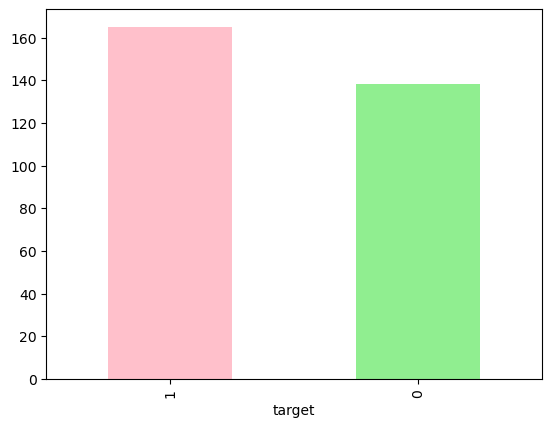

In [6]:
df['target'].value_counts().plot(kind = 'bar', color=["pink" , 'lightgreen'] )

In [7]:
df.isna().sum()

## We have not got any empty cell or any missing data entry

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease count with respect to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


**From this we can conclude that it is 75% of women in the data have heart disease while only 44.9 % of Male have heart disease. This indicates that women are more prone to heart disease**

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

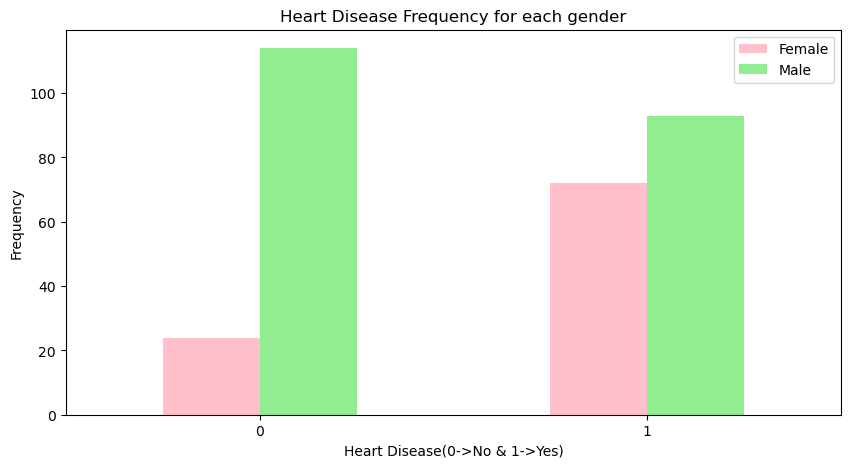

In [12]:
pd.crosstab(df['target'] , df.sex).plot(kind = 'bar',figsize=(10,5), color=['pink' , 'lightgreen'])
plt.title('Heart Disease Frequency for each gender')
plt.xlabel("Heart Disease(0->No & 1->Yes)")
plt.ylabel('Frequency')
plt.legend(['Female' , 'Male'])
plt.xticks(rotation=0)

### Age vs max heart rate

Text(0.5, 1.0, 'Max Heart Rate vs Age')

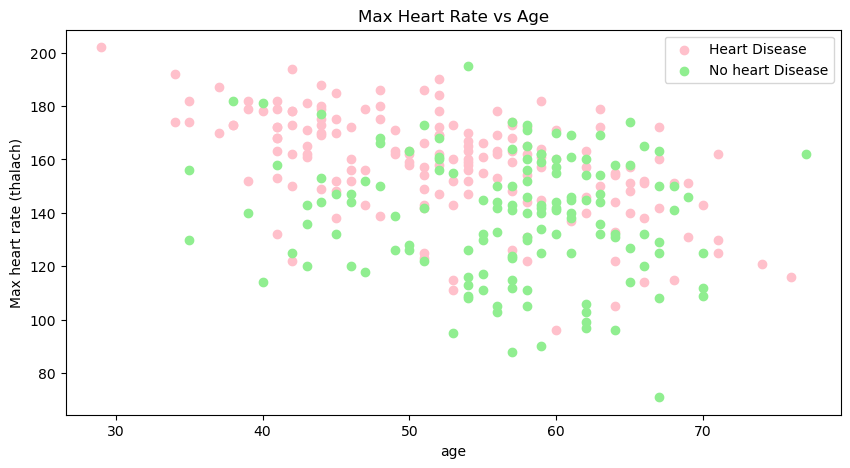

In [13]:
plt.figure(figsize=(10,5))

plt.scatter(df.age[df.target == 1] , df.thalach[df.target == 1] , color=['pink'])

plt.scatter(df.age[df.target==0] , df.thalach[df.target==0] , color=['lightgreen'])

plt.legend(['Heart Disease' , 'No heart Disease'])
plt.xlabel('age')
plt.ylabel('Max heart rate (thalach)')
plt.title('Max Heart Rate vs Age')

<Axes: ylabel='Frequency'>

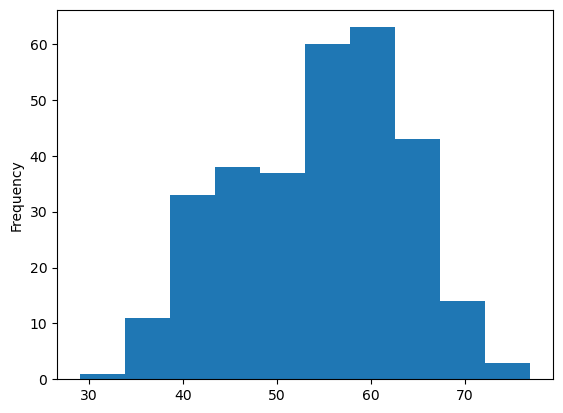

In [14]:
### Age Distribution 
df['age'].plot.hist()

## Chest Pain vs target 
**cp - chest pain type:** 
- 0 : Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df['cp'], df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0.5, 1.0, 'Chest Pain relation with heart disease')

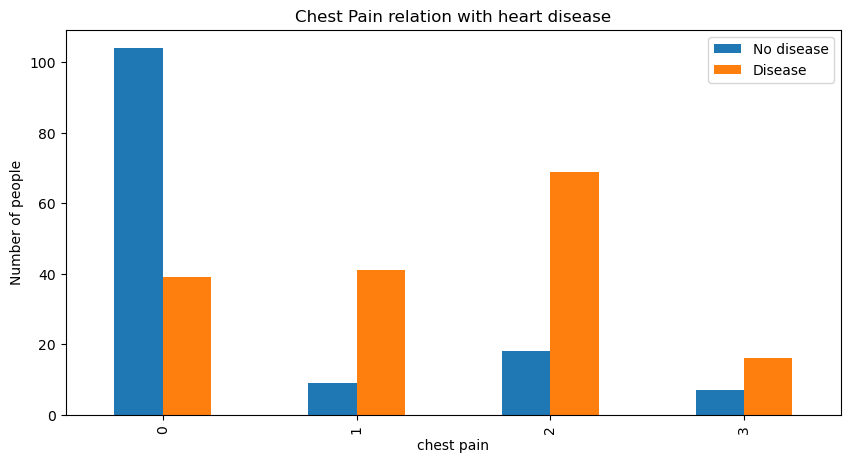

In [16]:
pd.crosstab(df['cp'] , df.target).plot(kind='bar', figsize=(10,5))
plt.xlabel('chest pain')
plt.ylabel('Number of people')
plt.legend(['No disease','Disease'])
plt.title('Chest Pain relation with heart disease')

**From above bar graph we can conclude that peaple who have Non anginal pain have higher chance(79.3%) of having heart disease**

## **trestbps(resting blood pressure) effect on heart disease chance**

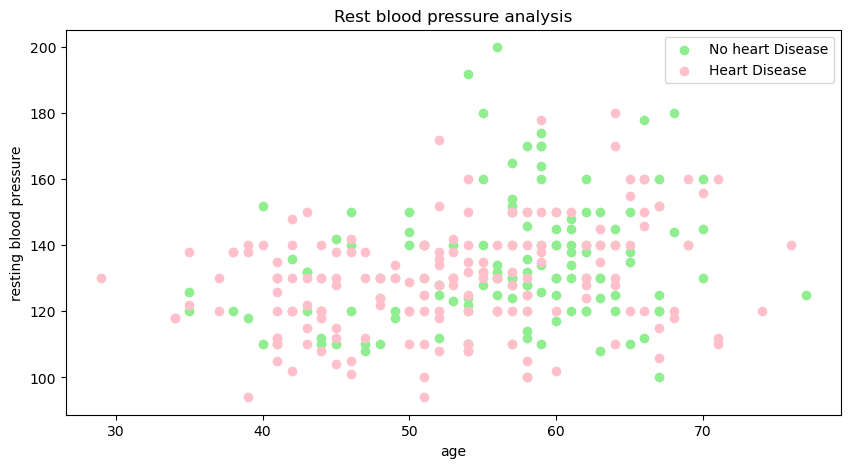

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(df['age'][df['target'] == 0]  , df['trestbps'][df['target'] == 0], color=['lightgreen'])
plt.scatter(df.age[df['target'] == 1] , df.trestbps[df['target'] == 1] , color=['pink'])
plt.xlabel('age')
plt.ylabel('resting blood pressure')
plt.title('Rest blood pressure analysis')
plt.legend(['No heart Disease','Heart Disease'])

**Here we can not make a guess of how trestbps is related to heart disease and age**

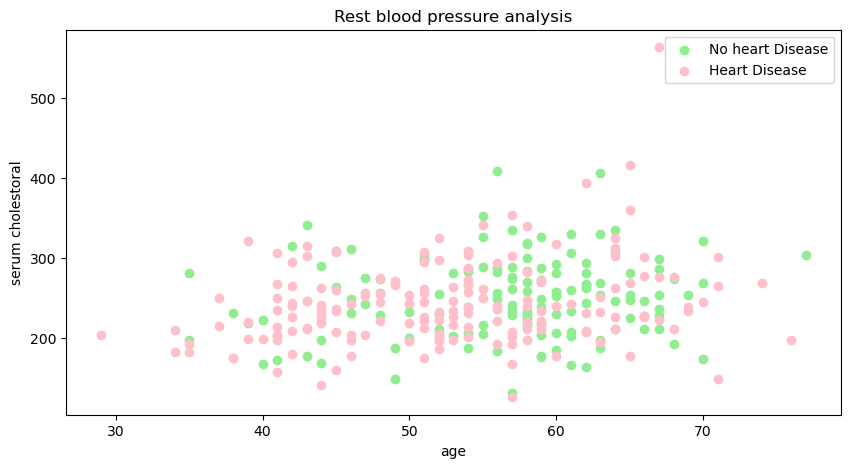

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(df['age'][df['target'] == 0]  , df['chol'][df['target'] == 0], color=['lightgreen'])
plt.scatter(df.age[df['target'] == 1] , df.chol[df['target'] == 1] , color=['pink'])
plt.xlabel('age')
plt.ylabel('serum cholestoral')
plt.title('Rest blood pressure analysis')
plt.legend(['No heart Disease','Heart Disease'])

## **Correlation**

(14.5, -0.5)

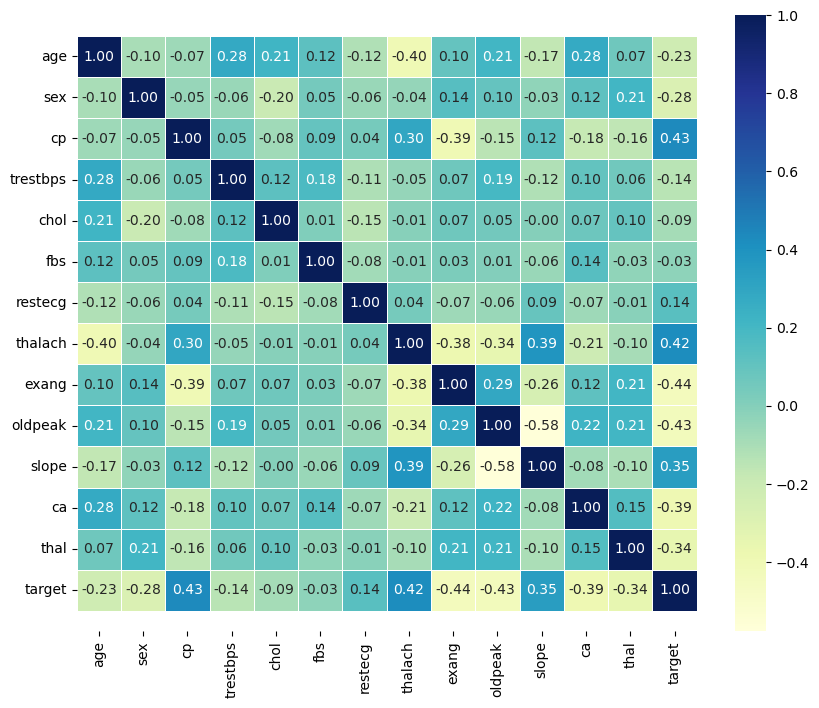

In [19]:
corr_mat = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_mat  , annot = True, linewidths = 0.5, fmt='.2f', cmap='YlGnBu')
bottom , top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

## **Modelling**

In [20]:
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
X = df.drop('target', axis=1)

In [91]:
np.random.seed(42)
X_train , X_test, y_train  , y_test = train_test_split(X, y , test_size=0.2)

In [92]:
X_train , len(X_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 188   50    1   2       140   233    0        1      163      0      0.6   
 71    51    1   2        94   227    0        1      154      1      0.0   
 106   69    1   3       160   234    1        0      131      0      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 102   63    0   1       140   195    0        1      179      0      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 1

In [93]:
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [94]:
models = {'logistic regression': LogisticRegression() ,
         'KNN': KNeighborsClassifier(),
         'Random Forest' : RandomForestClassifier()}

def fit_and_score(models, X_train , X_test , y_train , y_test) :
    np.random.seed(10)
    model_scores = {}
    for name , model in models.items() :
        model.fit(X_train , y_train)
        model_scores[name] = model.score(X_test , y_test)
    return model_scores

In [95]:
model_score = fit_and_score(models, X_train , X_test , y_train , y_test)
model_score

C:\Users\sansk\ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparision 

In [96]:
model_accuracy = pd.DataFrame(model_score, index=['accuracy'])
model_accuracy

,logistic regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


<Axes: >

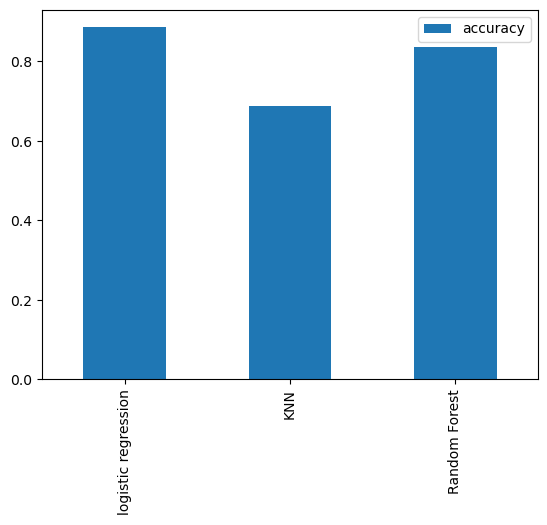

In [97]:
model_accuracy.T.plot.bar()

I have got our baseline model, now I will do the following :
- Hyperparameter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 score
- Classification report
- ROC  curve
- Area under ROC curve (AUC)

## Hyperparameter Tuning 

In [98]:
# Tuning KNN 
train_score = []
test_score = []

neighbors = np.arange(1,21,1);
knn = KNeighborsClassifier()
for i in neighbors :
    knn.set_params(n_neighbors=i)
    knn.fit(X_train , y_train)
    train_score.append(knn.score(X_train , y_train))
    test_score.append(knn.score(X_test , y_test))
    

In [99]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [100]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score of this data is : 75.4098


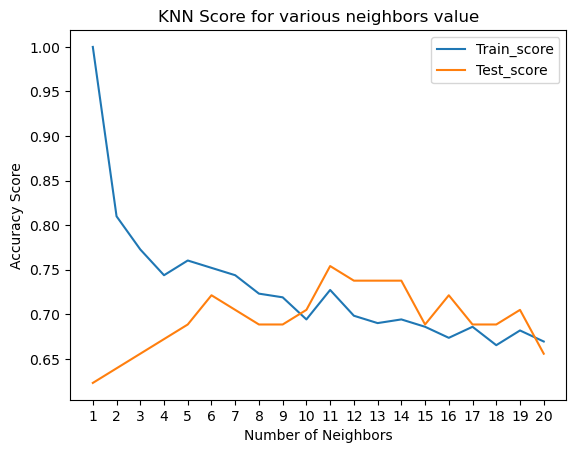

In [101]:
plt.plot(neighbors , train_score, label='Train Score')
plt.plot(neighbors, test_score, label='Test Score')
plt.xticks(np.arange(1,21 , 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('KNN Score for various neighbors value')
plt.legend(['Train_score', 'Test_score'])

print(f"Maximum KNN score of this data is : {max(test_score)*100:.4f}")

**From above result we can clearly see that ever after hyperparameter tuning KNN model is much behind RandomForest and Logistic Regression. Thus we will now complare there 2**

## Using RandomisedSearchCV for hyperparameter tuning 
- LogisticRegression()
- RandomForestClassifier()

In [102]:
log_reg_grid = {'C':np.logspace(-4, 4, 20),
               "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                "max_iter": [50, 800, 100, 200, 250, 300]
               }
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
          "max_depth" : [None , 3, 5, 10],
          "min_samples_split": np.arange(2,30,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": ["sqrt", "log2", None]}


Now we have made hyperparameter grid for each model, let's tune them using RandomizedSearchCV

In [103]:
np.random.seed(3)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions = log_reg_grid,
                               cv= 5,
                               n_iter = 50,
                               verbose = True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\sansk\ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sansk\ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [50, 800, 100, 200, 250,
                                                     300],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   verbose=True)

In [104]:
rs_log_reg.best_params_

{'solver': 'lbfgs', 'max_iter': 200, 'C': 0.23357214690901212}

In [105]:
rs_log_reg.score(X_test , y_test)

0.8852459016393442

Now lets do the same for RandomForest 

In [106]:
rs_rf = RandomizedSearchCV( RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          verbose=True,
                          n_iter = 100)

rs_rf.fit(X_train , y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [107]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 3}

In [108]:
rs_rf.score(X_test , y_test)

0.8688524590163934

## Using GridSearchCV for hyperparameter tuning

In [112]:
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":['liblinear']
}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [113]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [114]:
gs_log_reg.score(X_test , y_test)

0.8852459016393442

In [43]:
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
           "criterion" : ["log_sqrt"]
          "max_depth" : [None , 3, 5, 10],
          "min_samples_split": np.arange(2,30,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": ["sqrt", "log2", None]}
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                    cv = 5, 
                    verbose = True)
gs_rf.fit(X_train , y_train)

Fitting 5 folds for each of 25200 candidates, totalling 126000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [44]:
gs_rf.best_params_

{'criterion': 'log_loss',
 'max_features': 'sqrt',
 'min_samples_leaf': 19,
 'min_samples_split': 8,
 'n_estimators': 60}

In [46]:
gs_rf.score(X_test , y_test)

0.8032786885245902

## Evaluating the model
* ROC curve and AUC score
* Confusion Matrix
* classification report 
* Precision 
* Recall 
* F1-score

In [135]:
y_preds = gs_log_reg.predict(X_test)
y_preds[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [136]:
y_preds_prob = gs_log_reg.predict_proba(X_test)
y_preds_prob[:5]

array([[0.86725274, 0.13274726],
       [0.24408504, 0.75591496],
       [0.18547577, 0.81452423],
       [0.94530777, 0.05469223],
       [0.11546643, 0.88453357]])

In [128]:
y_prob_positive = y_preds_prob[: , 1]
y_prob_positive[:5]

array([0.13274726, 0.75591496, 0.81452423, 0.05469223, 0.88453357])

In [165]:
fpr , tpr , thresholds = roc_curve(y_test , y_prob_positive)

array([0.     , 0.03125, 0.375  , 0.375  , 0.59375, 0.59375, 0.71875,
       0.71875, 0.90625, 0.90625, 0.9375 , 0.9375 , 0.96875, 0.96875,
       1.     , 1.     ])

In [150]:
roc_auc = auc(fpr, tpr)
roc_auc

0.925646551724138

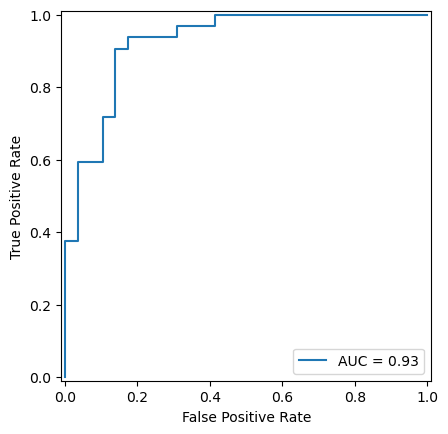

In [160]:
display = RocCurveDisplay(fpr = fpr , tpr=tpr, roc_auc=roc_auc)
display.plot()

In [161]:
## confusion matrics 
confusion_matrix(y_test , y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

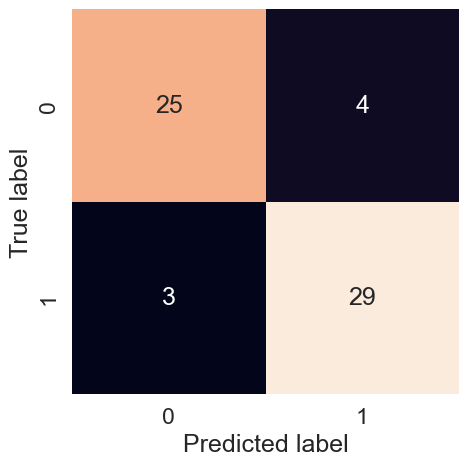

In [167]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test , y_preds):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")  
    
plot_conf_mat(y_test, y_preds)


In [169]:
## classification_report
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## calculation evaluation metrics using cross_validation

In [172]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [174]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [176]:
cv_acc = cross_val_score(clf, X , y , cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [179]:
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [184]:
cv_precision = cross_val_score(clf , X , y , cv = 5, scoring = "precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [186]:
cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [180]:
cv_recall = cross_val_score(clf , X , y,cv=5, scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [183]:
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [187]:
cv_f1 = cross_val_score(clf , X, y , cv=5, scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [190]:
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

In [206]:
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc , 
             "Precision" : cv_precision ,
             "Recall" : cv_recall,
             "F1_score": cv_f1},
             index=["value"])
cv_metrics

,Accuracy,Precision,Recall,F1_score
value,0.844699,0.820794,0.921212,0.867301


<Axes: title={'center': 'Cross_validated classification metrics'}, ylabel='Score'>

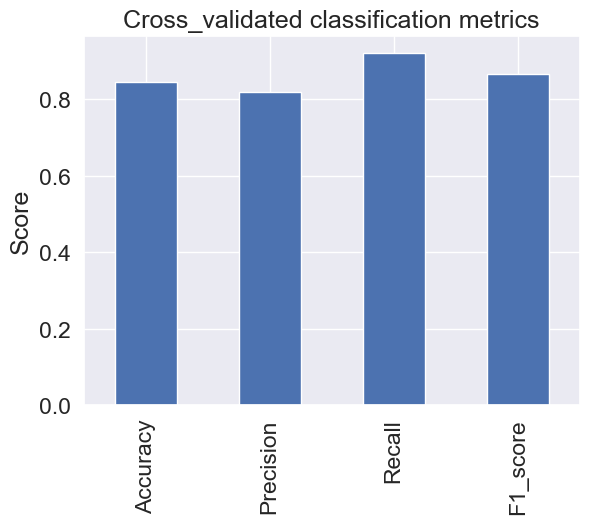

In [212]:
cv_metrics.T.plot.bar(title="Cross_validated classification metrics",
                   ylabel="Score",
                   legend=False)

## Feature Importance
Here we see what features have contributed most to the outcomes of the model and how did they contribute

In [214]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [216]:
clf.fit(X_train , y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [231]:
coefficients = clf.coef_[0]
odd_ratios = np.exp(coefficients)
coefficients

array([ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
        0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
        0.45051629, -0.63609895, -0.67663378])

In [240]:
feature_importance = pd.DataFrame({'Features': X_train.columns , 'Coefficients':coefficients})
feature_importance

,Features,Coefficients
0,age,0.003167
1,sex,-0.860447
2,cp,0.660670
3,trestbps,-0.011570
4,chol,-0.001664
5,fbs,0.043861
6,restecg,0.312758
7,thalach,0.024594
8,exang,-0.604131
9,oldpeak,-0.568628


<Axes: title={'center': 'Feature Importance '}>

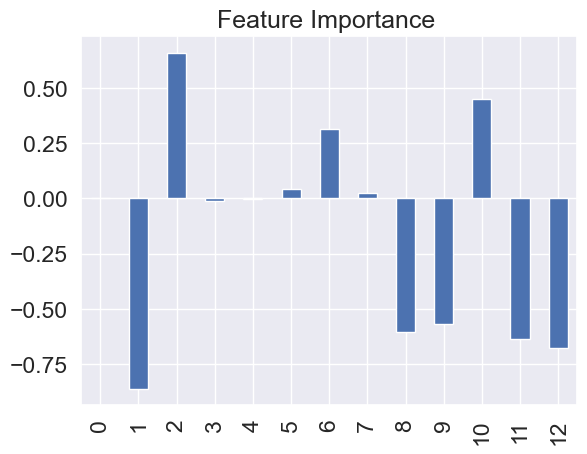

In [242]:
feature_importance.plot.bar(title="Feature Importance ", legend=False)

From this feature importance we can clearly see that `age` and `chol` do not contribute to the output while `tresbps`, `fbs` and `thalach` have little or no effect on the output as well